
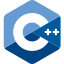
<br>

<div style="text-align:center; font-size:200%;">
 <b>Beispiel: Pfadkosten</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 09 Beispiel Pfadkosten.ipynb -->
<!-- slides/module_120_basics/topic_900_path_example.cpp -->


In einer früheren Lektion hatten wir einen Typ `Point3d` definiert, der einen
Punkt im dreidimensionalen Raum repräsentiert:

In [ ]:
struct Point3d
{
    double x;
    double y;
    double z;
};

In [ ]:
#include <iostream>

void print(Point3d p)
{
    std::cout << "Point3d{" << p.x << ", " << p.y << ", " << p.z << "}";
}

In [ ]:
double distance(Point3d p1, Point3d p2)
{
    double dx{p2.x - p1.x};
    double dy{p2.y - p1.y};
    double dz{p2.z - p1.z};
    return sqrt(dx * dx + dy * dy + dz * dz);
}

In [ ]:
Point3d p1{1.0, 2.0, 3.0};
Point3d p2{3.0, 2.0, 1.0};
Point3d p3{3.0, 2.0, 3.0};
Point3d p4{3.0, 2.0, 5.0};

In [ ]:
print(p1);

In [ ]:
distance(p1, p2)

In [ ]:
distance(p2, p1)

In [ ]:
distance(p1, p4)


## Kontrollfluss

- Wir wollen eine Funktion `path_cost(Point3d p1, Point3d p2)` definieren,
  die die Kosten berechnet um von `p1` nach `p2` zu kommen.
- Die Kosten sind folgendermaßen definiert:
    - Wenn `p1` höher ist als `p2`, dann sind die Kosten 1.5 mal der Abstand
      von `p1` und `p2`.
    - Wenn `p1` niedriger ist als `p2`, dann sind die Kosten 0.8 mal der
      Abstand von `p1` und `p2`.
    - Wenn `p1` und `p2` gleich hoch sind, dann sind die Kosten der Abstand
      von `p1` und `p2`.
    - Die Höhe wird durch das `z`-Attribut angegeben.

In [ ]:
double path_cost(Point3d p1, Point3d p2)
{
    if (p1.z > p2.z) {
        return 1.5 * distance(p1, p2);
    }
    else if (p1.z < p2.z) {
        return 0.8 * distance(p1, p2);
    }
    else {
        return distance(p1, p2);
    }
}

In [ ]:
path_cost(p1, p2)

In [ ]:
path_cost(p2, p1)

In [ ]:
path_cost(p1, p3)

In [ ]:
path_cost(p3, p1)

In [ ]:
path_cost(p1, p4)

In [ ]:
path_cost(p4, p1)

In [ ]:
#include <vector>

In [ ]:
double path_cost(const std::vector<Point3d>& points)
{
    if (points.size() == 0) {
        return 0.0;
    }
    double result{0.0};
    Point3d prev{points[0]};
    for (const Point3d& p : points) {
        result += path_cost(prev, p);
        prev = p;
    }
    return result;
}

In [ ]:
std::vector<Point3d> path{};

In [ ]:
path_cost(path)

In [ ]:
path.push_back(Point3d{1.0, 2.0, 0.0});
path_cost(path)

In [ ]:
path.push_back(Point3d{2.0, 1.0, 0.0});
path_cost(path)

In [ ]:
path.push_back(Point3d{2.0, 3.0, 1.0});
path_cost(path)